In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# 1. Contours Hierarchy
    이전에 findContours로 Contours Points와 Hierarhcy를 반환받는다고 하였다. Image에는 여러가지 Contours가 존재하고, 그 사이에는 상관관계가 존재하며, 그 관계를 Contours Hierarchy라고 한다. 이들의 상관관계를 통해서 Parent, Child 혹은 동등한 상관관계에서의 이웃을 파악할 수 있다.
    
    Contours를 찾다보면 해당 Contours가 독립적으로 존재하는 Contours일 경우도 있고 내부에 Contour가 존재하는 경우도 있다. 각각 동일한 수준에서 Contour가 존재하는 경우 같은 계층에 존재한다고 하며 Contour 내부에 Contour가 존재하는 경우 바깥의 Contour를 부모계층, 내부의 Contour를 자식계층이라고 한다.
    
    이를 Contours의 index와 -1로 표현한다. 반환된 hierarchy의 index가 의미하는 바는 다음과 같다.
    - 0 : 동일 계층에서 다음 Contour의 index, 없으면 -1
    - 1 : 동일 계층에서 이전 Contour의 index, 없으면 -1
    - 2 : 자식 계층 Contour의 index, 가장 하위 계층이면 -1
    - 3 : 부모 계층 Contour의 index, 가장 상위 계층이면 -1

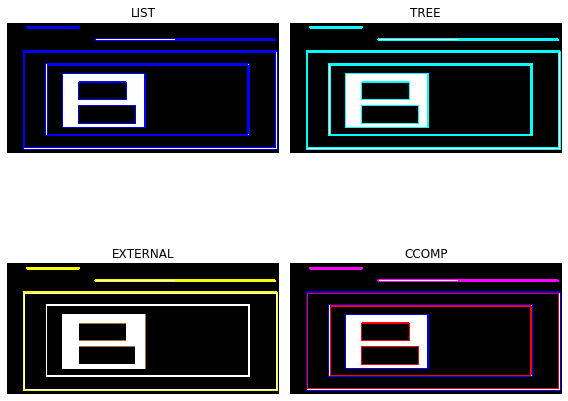

In [2]:
img = cv2.imread('hierarchy.jpg')
img2 = img.copy()
img3 = img.copy()
img4 = img.copy()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
res, thr = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

cnt_list, hierarchy_list = cv2.findContours(thr, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnt_tree, hierarchy_tree = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt_external, hierarchy_external = cv2.findContours(thr, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt_ccomp, hierarchy_ccomp = cv2.findContours(thr, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img, cnt_list, -1, (0, 0, 255), 3)
cv2.drawContours(img2, cnt_tree, -1, (0, 255, 255), 3)
cv2.drawContours(img3, cnt_external, -1, (255, 255, 0), 3)
for i in range(len(cnt_ccomp)):
    ccomp = cnt_ccomp[i]
    if hierarchy_ccomp[0][i][2] == -1 and hierarchy_ccomp[0][i][3] == -1:
        cv2.drawContours(img4, [ccomp], -1, (255, 0, 255), 3)        
    elif hierarchy_ccomp[0][i][2] == -1:
        cv2.drawContours(img4, [ccomp], -1, (255, 0, 0), 3)
    elif hierarchy_ccomp[0][i][3] == -1:
        cv2.drawContours(img4, [ccomp], -1, (0, 0, 255), 3)

titles = ['LIST', 'TREE', 'EXTERNAL', 'CCOMP']
images = [img, img2, img3, img4]

plt.figure(figsize=(8, 8))
for i in range(len(images)):
    plt.subplot(2, 2, i+1)
    plt.title(titles[i])
    plt.imshow(images[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

    findContours 함수로 Contours Points를 찾을 때, hierarchy에 영향을 주는 인자는 mode라고 이야기한 바 있다. Hierarchy를 구성하는 다양한 mode가 있으며 가각이 무슨 역할을 하는지는 RetrievalModes를 통해 참고할 수 있다.
    
    1. RETR_LIST
    2. RETR_TREE
    3, RETR_EXTERNAL
    4. RETR_CCOMP

## 1. RETR_LIST
    해당 mode는 모든 Contours를 찾지만 hierarchy의 상관관계를 고려하지 않는 특성이 있다. 즉, 부모/자식 간의 관계를 고려하지 않은 채 Contours의 선/후 관계만을 표현한다.

In [3]:
print(hierarchy_list[0])

[[ 1 -1 -1 -1]
 [ 2  0 -1 -1]
 [ 3  1 -1 -1]
 [ 4  2 -1 -1]
 [ 5  3 -1 -1]
 [ 6  4 -1 -1]
 [ 7  5 -1 -1]
 [ 8  6 -1 -1]
 [-1  7 -1 -1]]


## 2. RETR_TREE
    해당 mode는 모든 Contours의 hierarchy까지 완전하기 표현하는 특성이 있다. 누구에게도 포함되지 않은 Contour는 hierarchy의 0단계가 되고, 그 안쪽으로 포함되는 Contour는 순서대로 hierarchy를 부여받는다.

In [4]:
print(hierarchy_tree[0])

[[ 7 -1  1 -1]
 [-1 -1  2  0]
 [-1 -1  3  1]
 [-1 -1  4  2]
 [-1 -1  5  3]
 [ 6 -1 -1  4]
 [-1  5 -1  4]
 [ 8  0 -1 -1]
 [-1  7 -1 -1]]


## 3. RETR_EXTERNAL
    해당 mode는 가장 바깥쪽, 즉 최상위 부모계층에 있는 Contours 만을 반환한다. RETR_TREE mode로 반환된 hierarchy에서 3번째 index가 -1인 Contours 만을 반환한다.

In [5]:
print(hierarchy_external[0])

[[ 1 -1 -1 -1]
 [ 2  0 -1 -1]
 [-1  1 -1 -1]]


## 4. RETR_CCOMP
    해당 mode는 부모/자식 관계를 2단계로 표현한다. 독립적으로 떨어져 있는 Contours는 부모/자식 관계가 따로 존재하지 않으므로 해당 Contours의 hierarchy의 2번째, 3번째 index는 -1이지만, 안에 구멍이 뚫려있는 Contours의 경우는 조금 다르다.
    
    안에 구멍이 뚫려있는 직사각형의 바깥쪽 Contours Line은 내부의 Contours Line을 포함하고 있으므로 부모, 내부의 Contours는 자식 관계가 명확하게 된다. 하지만 자식 Contours Line 내부에 또 다른 구멍이 뚫려있으면 해당 구멍을 나타내는 Contours Line은 다시 부모의 hierarchy 값을 가지게 된다. 즉 가장 바깥쪽 Line과 구멍 속 구멍 Line은 동일한 hierarchy 값을 가진다.

In [6]:
print(hierarchy_ccomp[0])

[[ 3 -1  1 -1]
 [ 2 -1 -1  0]
 [-1  1 -1  0]
 [ 5  0  4 -1]
 [-1 -1 -1  3]
 [ 7  3  6 -1]
 [-1 -1 -1  5]
 [ 8  5 -1 -1]
 [-1  7 -1 -1]]
